In [18]:
# Data Science Project: Planning Stage (Individual)
# Diego Arman Tabatabaei
# Student ID: 56561418
# DSCI 100
# November 12, 2025

# In this project, we will be exploring two different data sets related to a study conducted by a research group in Computer Science at UBC, led by Frank Wood. 
#These 2 files are a part of a study conducted in Minecraft to help train an AI to identify different levels of skill in gameplay, so that it can mimic them with precision.

# DATA:
# 1: - players.csv: Contains data of the participants
# experience: Player Skill
# subscribe: Logical value showing if the player is subscribed to the newsletter
# hashedEmail: Encryption of participant's email
# played_hours: Total gameplay hours
# name: Player name
# Age: Player age

# 2: - sessions.csv: The data of the gameplay sessions
# hashedEmail: Encryption of the email of the participant
# start_time: start time of the session
# end_time: end time of the session
# original_start_time: alternate measurement of start time 
# original_end_time: alternate measurement of end time

#I've noticed a few issues, especially with the sessions data. The fact that it doesn't contain player names makes it very hard to identify which player is the one playing that session.
# The reason why I believe it's important is that you can see how far a player has progressed throughout the game, and relate it to the time it took them to get there, to measure skill. Being able to relate that to the player name could help find correlations and relationships with variables in the player data, such as age and gender.
# Another issue I see is that there isn't a description in the CSV files, explaining what each variable may mean. Perhaps the original_start_time in the sessions.csv may mean something that we don't know without a solid explanation.

# Broad question Question 1
# specific question “Can age and play hours predict experience in the players' data set?”
# The reason for my question choice is that age could be a good predictor of whether the player will subscribe to the newsletter. 
# METHODS AND PLAN
# The method I will be using is creating a K-NN model and using cross-validation to predict the class. I will be using the subscription as the prediction, and the age of the participant as a predictor. 
# - Why is this method appropriate?
# Using a K nearest neighbors would be ideal for this specific question, as age and play hours are numeric values that can be plugged into the scatterplot, and can predict subscriptions. The scatter plot I visualizedld be used for a K nearest neighbor model..

# - Which assumptions are required, if any, to apply the method selected?
# Is there a relationship between game time, age, and subscription? 

# - What are the potential limitations or weaknesses of the method selected?
# There may not be enough players to be able to train the data enough with cross-validation to get an adequate prediction.

# - How are you going to compare and select the model?
# I'm leaning towards a K-nearest Neighbors, since we are predicting a category.

# - How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross-validation?
# I'm going to be splitting the training data into a 5-fold cross-validation to find the best K, for the K-NN model.


#GitHub Link
#https://github.com/YodawgYT/Project-Planning-Diego-Tabatabataei-Group-39

In [28]:
library(tidyverse)
library(repr)
library(tidymodels)
players_data <- read_csv("https://raw.githubusercontent.com/YodawgYT/Project-Planning-Diego-Tabatabataei-Group-39/refs/heads/main/players.csv")
sessions_data <- read_csv("https://raw.githubusercontent.com/YodawgYT/Project-Planning-Diego-Tabatabataei-Group-39/refs/heads/main/sessions.csv")

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this 

In [51]:
library(tidyverse)
players_numeric <- players_data |>
select(Age, played_hours) |>
mutate(Age = as.numeric(Age), played_hours= as.numeric(played_hours)) |>
filter(!is.na(Age), !is.na(played_hours))
players_numeric

Age,played_hours
<dbl>,<dbl>
9,30.3
17,3.8
17,0.0
21,0.7
21,0.1
17,0.0
19,0.0
21,0.0
47,0.1


In [56]:
players_numeric_means <- players_numeric |>
  summarise(across(everything(), mean, na.rm = TRUE))

players_numeric_means

Age,played_hours
<dbl>,<dbl>
21.13918,5.904639


In [57]:

sessions_numeric <- sessions_data |>
select(original_start_time, original_end_time)
sessions_numeric

original_start_time,original_end_time
<dbl>,<dbl>
1.71977e+12,1.71977e+12
1.71867e+12,1.71867e+12
1.72193e+12,1.72193e+12
1.72188e+12,1.72188e+12
1.71665e+12,1.71665e+12
1.71916e+12,1.71916e+12
1.71317e+12,1.71317e+12
1.72688e+12,1.72689e+12
1.71894e+12,1.71894e+12


In [58]:
sessions_numeric_means <- sessions_numeric |>
  summarise(across(everything(), mean, na.rm = TRUE))

sessions_numeric_means

original_start_time,original_end_time
<dbl>,<dbl>
1.719201e+12,1.719196e+12


In [40]:
library(tidyverse)
players_wrangled <- players_data |>
select(Age, played_hours, subscribe) |>
mutate(subscribe= as.factor(subscribe), Age = as.numeric(Age), played_hours= as.numeric(played_hours)) |>
filter(!is.na(Age), !is.na(played_hours))
players_wrangled

Age,played_hours,subscribe
<dbl>,<dbl>,<fct>
9,30.3,TRUE
17,3.8,TRUE
17,0.0,FALSE
21,0.7,TRUE
21,0.1,TRUE
17,0.0,TRUE
19,0.0,TRUE
21,0.0,FALSE
47,0.1,TRUE


Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


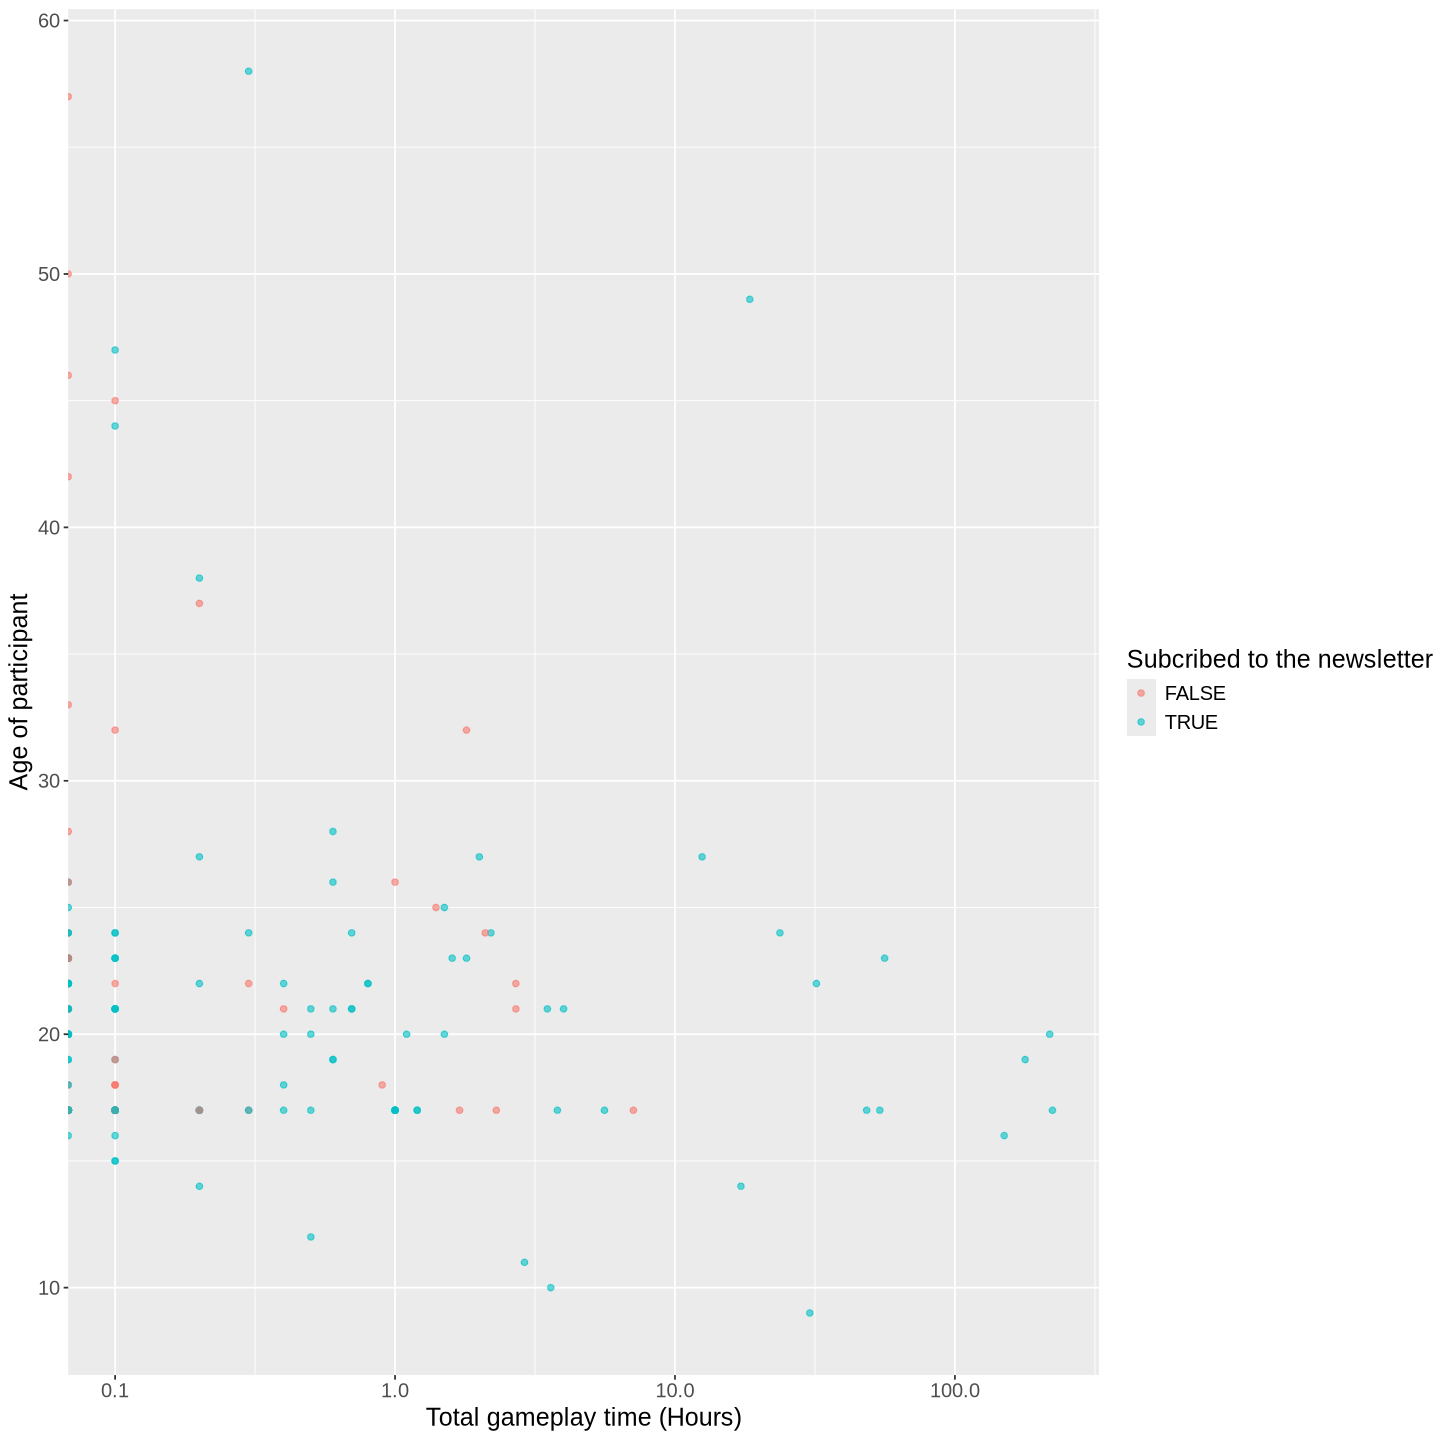

In [50]:
options(repr.plot.width= 12, repr.plot.height= 12)
players_scatter_plot <- players_wrangled |>
ggplot(aes(x= played_hours, y= Age, color= subscribe)) +
geom_point(alpha = 0.6) +
scale_x_log10()+
labs(x= "Total gameplay time (Hours)", y= "Age of participant", color= "Subcribed to the newsletter", title= )+
theme(text= element_text(size=15))
players_scatter_plot